# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Data Analysis</a></li>
    <li><a href="#conclusion">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In the following project we are going to gather and analyze data of the Twitter account "<a href = "https://twitter.com/dog_rates"> WeRateDogs </a>". For that, data is gathered via manual download, programmatical download and over an API. After that I am going to assess this data, define the issues found during the assessment and clean these issues to get a cleaned master dataframe. 

<a id='sources'></a>
## Data Sources

>1. **Name:** WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive->enhanced/twitter-archive-enhanced.csv">Udacity</a></li>    
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

>2. **Name:** Tweet image predictions (image_predictions.tsv)</li>
><ul>   
>    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">Udacity</a></li>     
>    <li><b>Method of gathering:</b> Programmatical download via Requests</li>
></ul>

>3. **Name:** Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDogs™</a></li>    
>    <li><b>Method of gathering:</b> API via Tweepy</li>
></ul>


In [1]:
#importing the necessary packages
import requests
import numpy as np
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import timeit

<a id='gathering'></a>
## Data Gathering

#### 1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)

In [2]:
#Reading the csv files
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet image predictions (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#get response
response = requests.get(url)

#write return to an image
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
predict_df= pd.read_csv('image_predictions.tsv', sep = '\t')
predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional Twitter data (tweet_json.txt)

To gather this data we will use the tweepy API.

In [5]:
consumer_key = "Hm1kEaUYr2h857iQ3qlWHGKNK" 
consumer_secret = "AhPpCWQQSRwvFM5KEOdQM8PK1myrF6c4tRMI3v8ZmoYGSRPSqD"
access_key = "2165047806-xA0USrSjzZd8Hhj2ZskCskG5E4w0ySoO2Qd7yCC"
access_secret = "Z7gt26cYsk70kcjoo7TcjFm0UhzygCiogsjaVAWqim56I"

# Authorization to consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Access to user's access key and access secret
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
api

In [7]:
twitter_ids = list(twitter_df.tweet_id.unique())
start = timeit.default_timer()

with open('tweet_json.txt', 'w') as file:
    for ids in twitter_ids:
        try:
            status = api.get_status(ids, tweet_mode="extended")
            json.dump(status._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print(f"Error - id: {ids}" + str(e))
            
end = timeit.default_timer()
print(end - start)

Error - id: 888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]


KeyboardInterrupt: 

In [8]:
api_data = []

#read the created file
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        #append a dictionary to the created list            
        api_data.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count'],
            'retweeted': tweet['retweeted'],
            'followers_count': tweet['user']['followers_count'],
            'display_text_range': tweet['display_text_range'],
        })          

api_df = pd.DataFrame(api_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'retweeted', 'followers_count', 'display_text_range'])
api_df.head()

,tweet_id,retweet_count,favorite_count,retweeted,followers_count,display_text_range
0,892420643555336193,7712,36236,False,8784083,"[0, 85]"
1,892177421306343426,5699,31258,False,8784083,"[0, 138]"
2,891815181378084864,3778,23534,False,8784083,"[0, 121]"
3,891689557279858688,7876,39536,False,8784083,"[0, 79]"
4,891327558926688256,8485,37748,False,8784083,"[0, 138]"


<a id='assessing'></a>
## Data Assessing

Now we are going to look for issues with the quality or the tidiness of the data and its dimensions.

### twitter_df

In [9]:
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,None,None,None,None
1158,724049859469295616,NaN,NaN,2016-04-24 01:38:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreggory. He just took a look at his s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724049859...,10,10,Kreggory,None,None,None,None
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None


In [10]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
Buddy           7
Toby            7
an              7
Daisy           7
Oscar           6
Rusty           6
Milo            6
Jack            6
Dave            6
Jax             6
Bella           6
Koda            6
Scout           6
Leo             6
Stanley         6
Larry           5
             ... 
Christoper      1
Akumi           1
Fido            1
Kathmandu       1
Loomis          1
Doobert         1
Tuco            1
Kaia            1
Bobby           1
Bobble          1
Tassy           1
Perry           1
Butters         1
Lucky           1
Spanky          1
Brady           1
Deacon          1
Timber          1
Jomathan        1
Rey             1
his             1
Jeffrie         1
Cecil           1
Damon           1
Brooks    

In [12]:
twitter_df[twitter_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twitter_df.tweet_id.nunique()

2356

In [14]:
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
dogs_names = []
dogs_names = twitter_df.name.unique()
dogs_names.sort()
dogs_names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

<b>During the visual assessment we can observe that:</b>
- Not all tweets could be classified as doggo, floofer, pupper or puppo and many of these columns contain "None"
- The source contains unnecessary HTML code
- There is the name "None" as well as many names that are incorrect in the name column
- Tweet_id should be str datatype
- Timestamp column should be datetime objects
- There are no duplicates in this data, so the number of unique tweet_ids should be the length of the df

In [16]:
twitter_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

- The range of the numerator varies greatly from 2 to 1776

In [17]:
twitter_df['rating_denominator'].value_counts().sort_values()

70        1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
0         1
40        1
16        1
2         1
7         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

- As seen in the numerator the denominator also seems to have a very big range

In [18]:
twitter_df[twitter_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


- We also see a denominator of 0 which is incorrect when rating something

### predict_df

In [19]:
predict_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
1109,723912936180330496,https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg,1,Samoyed,0.991772,True,Pomeranian,0.003626,True,chow,0.002232,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False


<b>During the visual assessment we can observe that:</b>
- the predicitions are sometimes lowercase, sometimes uppercase
- there is an underscore instead of a whitespace between the words
- there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

In [20]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- The tweet_id column must be str

- The best way to find duplicates is to look at the jpg - url. If there are value counts > 1, then this data contains duplicates/retweets.

In [21]:
predict_df.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg    2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg    2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg    2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
Name: jpg_url, dtype: int64

- As the same image is repeated twice, we can consider that there are retweets in this data

In [22]:
predict_df[predict_df.jpg_url == 'https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False


In [23]:
twitter_df[twitter_df.tweet_id == 829878982036299777]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None


- We only want Tweets with pictures which contain dogs. Let's see if there are pictures, for which the ML - Algorithm didn't predict any dogs.

In [24]:
predict_df.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


- After checking some of these pictures it gets clear, that sometimes the doggos are in the background or the pictures doesn't contain any dogs at all.

### api_df

In [25]:
api_df.sample(5)

,tweet_id,retweet_count,favorite_count,retweeted,followers_count,display_text_range
2,891815181378084864,3778,23534,False,8784083,"[0, 121]"
39,884562892145688576,4293,22807,False,8784083,"[0, 66]"
5,891087950875897856,2844,19012,False,8784083,"[0, 138]"
13,889638837579907072,4093,25386,False,8784083,"[0, 91]"
20,887705289381826560,4912,28392,False,8784083,"[0, 127]"


In [26]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
tweet_id              40 non-null int64
retweet_count         40 non-null int64
favorite_count        40 non-null int64
retweeted             40 non-null bool
followers_count       40 non-null int64
display_text_range    40 non-null object
dtypes: bool(1), int64(4), object(1)
memory usage: 1.7+ KB


- Looking at this info results we see that there are no missing values
- The tweet_id must be converted to str

## Assessing Summary

### Quality

##### `twitter_df` table
- The datatype of the tweet_id column is integer and should be str
- The datatype of columns such as timestamp and retweeted_status_timestamp are incorrect
- The source column contains html code
- Some of the names of the dogs are incorrect.
- The columns which have missing values in doggo, floofer, pupper , puppo - has "None" instead of NaN
- Rating_numerator and rating_denominator have some inconsistent values

##### `predict_df` table
- The datatype of the tweet_id column is integer and should be str
- Contains retweets(multiple rows in column 'jpg_url')
- Sometimes the pictures do not contain dogs at all
- The predictions are sometimes uppercase, sometimes lowercase
- Also there is a "_" instead of a whitespace in the predictions

##### `api_df` table
- The datatype of the tweet_id column is integer and should be str

### Tidiness

##### `twitter_df` table
- The dog stages are in multiple columns and must be put into one column

##### `df_predict` table
- The prediction must be reduced to one column

##### `all` tables
- All the tables share a common tweet_id and must be merged together.

<a id='cleaning'></a>
## Data Cleaning

#### Cleaning steps:

<b>1.</b> Merge the tables together (Tidiness)<br>
<b>2.</b> Drop the replies, retweets and the corresponding columns (Quality)<br>
<b>3.</b> Drop the tweets without an image or with images which don't display doggos (Quality)<br>
<b>4.</b> Clean the datatypes of the columns (Quality)<br>
<b>5.</b> Extract the source from html code (Quality)<br>
<b>6.</b> Remove the incorrect names from the name column (Quality)<br>
<b>7.</b> Reduce the prediction columns into one column: breed (Tidiness)<br>
<b>8.</b> Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase (Quality)<br>
<b>9.</b> Convert Nones in all the 4 dog states to Nans (Quality)<br>
<b>10.</b> Merge the dog state columns 'doggo', 'floofer', 'pupper', 'puppo' into a single column (Tidiness)<br>
<b>11.</b> Clean the wrong numerators and denominators (Quality)

**1. Merge the tables together (Tidiness)**

##### Define
We could clean all the tables one by one, but some cleaning is depenedent on one another. By merging the tables we can save time and effort.

#### Code

In [27]:
#outer join to not loose rows at first
merged_df = pd.merge(twitter_df, predict_df, on = 'tweet_id', how = 'outer')
merged_df = pd.merge(merged_df, api_df, on = 'tweet_id', how = 'outer')

#### Test

In [28]:
merged_df.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,followers_count,display_text_range
1028,745789745784041472,NaN,NaN,2016-06-23 01:25:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He didn't win the Powerball. Quit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745789745...,...,0.008942,True,cocker_spaniel,0.001928,True,NaN,NaN,NaN,NaN,NaN
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,...,0.287955,True,Labrador_retriever,0.166331,True,NaN,NaN,NaN,NaN,NaN
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,...,0.042319,True,doormat,0.003956,False,NaN,NaN,NaN,NaN,NaN
1966,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673343217...,...,0.156891,True,miniature_pinscher,0.069556,True,NaN,NaN,NaN,NaN,NaN


- We create a copy of this merged dataframe as we may need to use this originally merged dataframe again

In [29]:
merged_df_clean = merged_df.copy()

**2. Drop the replies, retweets and the corresponding columns (Quality)**

##### Define
We have to remove the replies, retweets and the tweets without an image displaying a dog, because we only want original tweets with images.

#### Code

In [30]:
merged_df_clean = merged_df_clean[merged_df_clean['retweeted_status_id'].isnull()]

In [31]:
merged_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                    'retweeted_status_timestamp', 'expanded_urls', 'retweeted'], inplace=True, axis = 1)

#### Test

In [32]:
merged_df_clean.sample(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,display_text_range
1225,714141408463036416,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",10,10,None,None,None,None,...,golden_retriever,0.378812,True,redbone,0.003605,True,NaN,NaN,NaN,NaN
901,758474966123810816,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,11,10,Brandonald,None,None,None,...,Cardigan,0.244200,True,German_shepherd,0.100429,True,NaN,NaN,NaN,NaN
608,797971864723324932,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,12,10,None,None,None,pupper,...,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True,NaN,NaN,NaN,NaN
50,882627270321602560,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,13,10,Stanley,None,None,None,...,Chihuahua,0.251988,True,Cardigan,0.107699,True,NaN,NaN,NaN,NaN


In [33]:
merged_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'followers_count', 'display_text_range'],
      dtype='object')

**3. Drop the tweets without an image or with images which don't display doggos (Quality)**

##### Define
We have to remove the records for which there is no prediction of dogs, i.e., the neural network has not predicted a dog in even 3 tries

#### Code

In [34]:
merged_df_clean = merged_df_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

#### Test

In [35]:
merged_df_clean.shape

(1686, 26)

**4. Clean the datatypes of the columns (Quality)**

##### Define
We have to convert the datatypes of the columns for proper analysis.

#### Code

In [36]:
merged_df_clean['tweet_id'] = merged_df_clean['tweet_id'].astype('str')

In [37]:
merged_df_clean["timestamp"] = pd.to_datetime(merged_df_clean.timestamp)

#### Test

In [38]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1686 non-null object
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
doggo                 1686 non-null object
floofer               1686 non-null object
pupper                1686 non-null object
puppo                 1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null object
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null object
p3                    1686 non-null object
p3_conf               16

**5. Extract the source from html code (Quality)**

#### Define
HTML code is mentioned in the source column which is not needed, hence we just extract the required part out of it

#### Code

In [39]:
merged_df_clean.source = merged_df_clean.source.str.extract('\>(.*?)\<', expand = True)

#### Test

In [40]:
merged_df_clean.source.value_counts()

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

**6. Remove the incorrect names from the name column (Quality)**

#### Define
We have to remove the incorrect names present in our dataframe

#### Code

In [41]:
merged_df_clean.name.value_counts()

None          419
a              46
Cooper         10
Charlie        10
Lucy           10
Tucker          9
Oliver          9
Penny           8
the             7
Sadie           7
Daisy           7
Winston         7
Jax             6
Koda            6
Lola            6
Toby            6
Bella           5
Rusty           5
Leo             5
Oscar           5
Stanley         5
Bo              5
Bentley         4
Jack            4
Dave            4
Larry           4
Bear            4
Sophie          4
Bailey          4
Chester         4
             ... 
Rhino           1
Willy           1
Lambeau         1
DonDon          1
Gustav          1
Carper          1
Jomathan        1
Deacon          1
Canela          1
Astrid          1
Keet            1
Brooks          1
Eve             1
Mac             1
Bode            1
Angel           1
incredibly      1
Dutch           1
Harper          1
Kuyu            1
Kendall         1
Bobble          1
Chase           1
Lincoln         1
Perry     

In [42]:
for x in ['None', 'a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very']:
    merged_df_clean['name'].replace(x, np.nan, inplace = True)

#### Test

In [43]:
merged_df_clean.name.value_counts()

Lucy       10
Cooper     10
Charlie    10
Oliver      9
Tucker      9
Penny       8
Daisy       7
Sadie       7
Winston     7
Toby        6
Lola        6
Jax         6
Koda        6
Rusty       5
Stanley     5
Bella       5
Oscar       5
Leo         5
Bo          5
Maggie      4
Gus         4
Cassie      4
Winnie      4
Scout       4
Chester     4
Alfie       4
Duke        4
Oakley      4
Bear        4
Louis       4
           ..
Rey         1
Lilly       1
Kaia        1
Tuco        1
Doobert     1
Mutt        1
Frönq       1
Butters     1
Perry       1
Lincoln     1
Eve         1
Franq       1
Saydee      1
Mollie      1
Tango       1
Cali        1
Canela      1
Keet        1
Brooks      1
Mac         1
Chase       1
Bode        1
Angel       1
Donny       1
Dutch       1
Harper      1
Kuyu        1
Kendall     1
Bobble      1
Dante       1
Name: name, Length: 833, dtype: int64

**7. Reduce the prediction columns into one column: breed (Tidiness)**

#### Define
We have to reduce the prediction columns from the dataframe as they really don't work with the analysis very well

#### Code

In [46]:
def get_attr(x):
    if x[1] == True:
        return x[0]
    elif x[3] == True:
        return x[2]
    else:
        return x[5]

merged_df_clean['breed'] = merged_df_clean[['p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog']].apply(get_attr, axis = 1)

#### Test

In [47]:
merged_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,display_text_range,breed
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,0.090647,True,papillon,0.068957,True,5699.0,31258.0,8784083.0,"[0, 138]",Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,0.078253,True,kelpie,0.031379,True,3778.0,23534.0,8784083.0,"[0, 121]",Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,0.168086,True,spatula,0.040836,False,7876.0,39536.0,8784083.0,"[0, 79]",Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,8485.0,37748.0,8784083.0,"[0, 138]",basset
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,NaN,None,None,None,...,0.116317,True,Indian_elephant,0.076902,False,2844.0,19012.0,8784083.0,"[0, 138]",Chesapeake_Bay_retriever


Since we convert these columns into a single column we do not need these columns

In [48]:
merged_df_clean.drop(columns = ['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], inplace= True)

In [49]:
merged_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p2', 'p3', 'retweet_count',
       'favorite_count', 'followers_count', 'display_text_range', 'breed'],
      dtype='object')

**8. Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase (Quality)**

#### Define
We need to convert the entire breed column, as dofferent format does not make the analysis any easier

#### Code

In [50]:
merged_df_clean.breed = merged_df_clean.breed.str.replace('_', ' ')
merged_df_clean.breed = merged_df_clean.breed.str.lower()

#### Test

In [51]:
merged_df_clean.breed.value_counts().head(10)

golden retriever      152
labrador retriever    105
pembroke               93
chihuahua              90
pug                    58
toy poodle             47
chow                   44
samoyed                41
pomeranian             41
french bulldog         31
Name: breed, dtype: int64

**9. Convert Nones in all the 4 dog states to Nans (Quality)**

#### Define
Presence of nones in the dataframe creates the lost of problems in the analysis as well as results

#### Code

In [52]:
merged_df_clean.doggo.value_counts()

None     1622
doggo      64
Name: doggo, dtype: int64

In [53]:
for x in ['doggo', 'floofer', 'pupper', 'puppo']:
    merged_df_clean[x].replace('None', np.nan, inplace = True)

#### Test

In [54]:
merged_df_clean.doggo.value_counts()

doggo    64
Name: doggo, dtype: int64

**10. Merge the dog state columns 'doggo', 'floofer', 'pupper', 'puppo' into a single column (Tidiness)**/

#### Define
We need to convert these into a single column as they represent a single factor and keeping them all in the dataframe isn't useful.

#### Code

In [55]:
merged_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p2', 'p3', 'retweet_count',
       'favorite_count', 'followers_count', 'display_text_range', 'breed'],
      dtype='object')

In [56]:
merged_df_clean['dog_state'] = merged_df_clean.loc[:,['doggo', 'floofer', 'pupper', 'puppo']].ffill(axis=1).iloc[:,-1]

We need to however check whether there are 2 states given for a particular dog

In [57]:
pd.set_option('display.max_colwidth', -1)
merged_df_clean[['text','doggo', 'floofer', 'pupper', 'puppo']].dropna(thresh=3)

,text,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,NaN,NaN,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,NaN,NaN
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,NaN,pupper,NaN
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,NaN,pupper,NaN
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,NaN,pupper,NaN
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,NaN,pupper,NaN
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,NaN,pupper,NaN
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,NaN,pupper,NaN
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,NaN,pupper,NaN
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,NaN,pupper,NaN


So we need to manually search for each of these and find the states of dog from either the text or pictures

In [58]:
#191 puppo
#200 floofer
#460 puppo
#531 two dogs
#565 two dogs
#575 pupper
#889 two dogs
#956 not classified by author
#1063 two dogs
#1113 two dogs

merged_df_clean.loc[191, 'dog_state'] = 'puppo'
merged_df_clean.loc[200, 'dog_state'] = 'floofer'
merged_df_clean.loc[460, 'dog_state'] = 'puppo'
merged_df_clean.loc[531, 'dog_state'] = np.nan
merged_df_clean.loc[565, 'dog_state'] = np.nan
merged_df_clean.loc[575, 'dog_state'] = 'pupper'
merged_df_clean.loc[889, 'dog_state'] = np.nan
merged_df_clean.loc[956, 'dog_state'] = np.nan
merged_df_clean.loc[1063, 'dog_state'] = np.nan
merged_df_clean.loc[1113, 'dog_state'] = np.nan

As we merge the four state columns we no longer need them in our dataframe, hence we drop them

In [59]:
merged_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [60]:
merged_df_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,retweet_count,favorite_count,followers_count,display_text_range,breed,dog_state
2206,668631377374486528,2015-11-23 03:25:17,Twitter for iPhone,Meet Zeek. He is a grey Cumulonimbus. Zeek is hungry. Someone should feed Zeek asap. 5/10 absolutely terrifying https://t.co/fvVNScw8VH,5,10,Zeek,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1.0,miniature_schnauzer,Australian_terrier,silky_terrier,NaN,NaN,NaN,NaN,miniature schnauzer,NaN
1207,715733265223708672,2016-04-01 02:51:22,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,10,10,NaN,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1.0,Dandie_Dinmont,miniature_poodle,toy_poodle,NaN,NaN,NaN,NaN,dandie dinmont,NaN
1884,674800520222154752,2015-12-10 03:59:15,Twitter for iPhone,This is Tedders. He broke his leg saving babies from the Pompeii eruption. 11/10 where's his Purple Heart? @POTUS https://t.co/cMI2AcLm4B,11,10,Tedders,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1.0,Pembroke,Cardigan,dingo,NaN,NaN,NaN,NaN,pembroke,NaN
1652,683481228088049664,2016-01-03 02:53:17,Twitter for iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,11,10,Banjo,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1.0,keeshond,chow,German_shepherd,NaN,NaN,NaN,NaN,keeshond,pupper
1814,676617503762681856,2015-12-15 04:19:18,Twitter for iPhone,I promise this wasn't meant to be a cuteness overload account but ermergerd look at this cozy pupper. 13/10 https://t.co/mpQl2rJjDh,13,10,NaN,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1.0,Chihuahua,Pomeranian,Pekinese,NaN,NaN,NaN,NaN,chihuahua,pupper


In [61]:
merged_df_clean.shape

(1686, 18)

**11. Clean the wrong numerators and denominators (Quality)**

#### Define
While assessing the dataframe, we found that the numerators and denominators were not in a proper format. So, we must replace the floats and drop the ones with multiple occurence.

#### Code

In [62]:
pattern = '(\d+(\.\d+)?\/\d+(\.\d+)?)'

merged_df_clean['rating'] = merged_df_clean.text.str.extract(pattern, expand = True)[0]

merged_df_clean[['num', 'denom']] = merged_df_clean['rating'].str.split('/', n=1, expand=True)

In [63]:
merged_df_clean.shape

(1686, 21)

In [64]:
merged_df_clean.rating_numerator = merged_df_clean.rating_numerator.astype('str')
merged_df_clean.rating_denominator = merged_df_clean.rating_denominator.astype('str')

In [65]:
merged_df_clean['check_num'] = merged_df_clean[['rating_numerator', 'num']].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)
merged_df_clean['check_denom'] = merged_df_clean[['rating_denominator', 'denom']].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [66]:
merged_df_clean.check_num.value_counts()

True     1682
False    4   
Name: check_num, dtype: int64

In [67]:
merged_df_clean.check_denom.value_counts()

True    1686
Name: check_denom, dtype: int64

In [68]:
merged_df_clean.query('check_num == False')[['rating_numerator', 'num', 'check_num']]

,rating_numerator,num,check_num
45,5,13.5,False
695,75,9.75,False
763,27,11.27,False
1712,26,11.26,False


In [69]:
pattern = '(\d+\.\d+\/\d+)'

merged_df_clean.text.str.extract(pattern, expand = True)[0].dropna()

45      13.5/10 
695     9.75/10 
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [70]:
df_num_clean = merged_df_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]

In [71]:
df_num_clean

45      13.5 
695     9.75 
763     11.27
1712    11.26
Name: 0, dtype: object

In [72]:
df_num_clean_index = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype('float64')

In [73]:
merged_df_clean.rating_numerator = merged_df_clean.rating_numerator.astype('float64')
merged_df_clean.rating_denominator = merged_df_clean.rating_denominator.astype('float64')

merged_df_clean.loc[df_num_clean_index, 'rating_numerator'] = df_num_clean_values
merged_df_clean.loc[df_num_clean_index].rating_numerator

45      13.50
695     9.75 
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

In [74]:
pattern = '(\d+(\.\d+)?\/\d+(\.\d+)?)'

print(merged_df_clean.text.str.count(pattern)[merged_df_clean.text.str.count(pattern) != 1])

pattern_clean_index = merged_df_clean.text.str.count(pattern)[merged_df_clean.text.str.count(pattern) != 1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [75]:
merged_df_clean.drop(pattern_clean_index, inplace = True)

In [76]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 1 to 2355
Data columns (total 23 columns):
tweet_id              1660 non-null object
timestamp             1660 non-null datetime64[ns]
source                1660 non-null object
text                  1660 non-null object
rating_numerator      1660 non-null float64
rating_denominator    1660 non-null float64
name                  1172 non-null object
jpg_url               1660 non-null object
img_num               1660 non-null float64
p1                    1660 non-null object
p2                    1660 non-null object
p3                    1660 non-null object
retweet_count         33 non-null float64
favorite_count        33 non-null float64
followers_count       33 non-null float64
display_text_range    33 non-null object
breed                 1598 non-null object
dog_state             252 non-null object
rating                1660 non-null object
num                   1660 non-null object
denom                 1660 n

In [77]:
#no more occurrences of the mentioned problem are left
print(merged_df_clean.text.str.count(pattern)[merged_df_clean.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


In [78]:
merged_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p2', 'p3',
       'retweet_count', 'favorite_count', 'followers_count',
       'display_text_range', 'breed', 'dog_state', 'rating', 'num', 'denom',
       'check_num', 'check_denom'],
      dtype='object')

In [79]:
merged_df_clean.drop(columns = ['num', 'denom', 'check_num','check_denom'], inplace= True)

#### Test

In [80]:
merged_df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,retweet_count,favorite_count,followers_count,display_text_range,breed,dog_state,rating
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon,5699.0,31258.0,8784083.0,"[0, 138]",chihuahua,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie,3778.0,23534.0,8784083.0,"[0, 121]",chihuahua,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,Labrador_retriever,spatula,7876.0,39536.0,8784083.0,"[0, 79]",labrador retriever,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer,8485.0,37748.0,8784083.0,"[0, 138]",basset,NaN,12/10
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,2844.0,19012.0,8784083.0,"[0, 138]",chesapeake bay retriever,NaN,13/10


In [81]:
#save the data to a *.csv file
merged_df_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## Data Analysis

**Questions:**

<b>1. </b>Based on the predicted, most likely uploaded dog breed: Which breed gets retweeted and favorited the most overall?<br>
<b>2. </b>What is the frequency of tweets being done by the users?<br>
<b>3. </b>What is the most predicted dog breed according to each of the algorithms?

**1. Based on the predicted, most likely uploaded dog breed: Which breed gets retweeted and favorited the most overall?**

For this we will look at the breed column in our cleaned dataframe and find the most likely dog breed

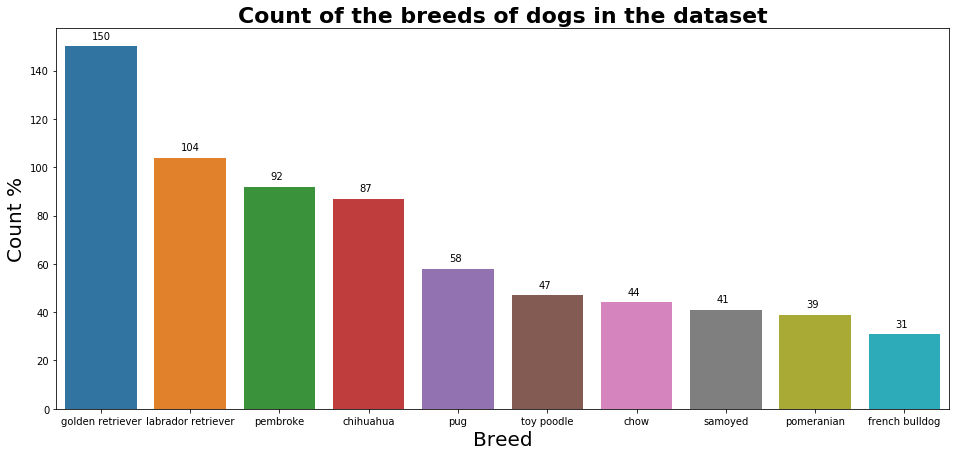

In [82]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.countplot(x = 'breed', data = merged_df_clean, order=merged_df_clean.breed.value_counts().iloc[:10].index)

ax.set_xlabel('Breed', fontsize = 20.0)
plt.ylabel('Count %', fontsize = 20.0)
ax.set_title('Count of the breeds of dogs in the dataset', fontweight='bold', fontsize = 22.0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))

The dogs displayed in the images are mostly golden retrievers with a count of 154 or labrador retrievers with a count of 105.

In [83]:
breed_group_df = merged_df_clean[['retweet_count', 'favorite_count', 'breed']].groupby('breed', as_index = False).sum()

In [84]:
breed_group_df.sort_values('retweet_count', ascending = False).head(10)

,breed,retweet_count,favorite_count
79,pembroke,32259.0,139545.0
80,pomeranian,17209.0,61063.0
55,italian greyhound,16516.0,72398.0
26,chihuahua,16481.0,87585.0
81,pug,15892.0,82829.0
40,french bulldog,14701.0,91871.0
6,basset,13397.0,66140.0
87,samoyed,12125.0,57536.0
44,golden retriever,10037.0,65533.0
68,mexican hairless,9555.0,31598.0


In [85]:
breed_group_df.sort_values('favorite_count', ascending = False).head(10)

,breed,retweet_count,favorite_count
79,pembroke,32259.0,139545.0
40,french bulldog,14701.0,91871.0
26,chihuahua,16481.0,87585.0
81,pug,15892.0,82829.0
55,italian greyhound,16516.0,72398.0
6,basset,13397.0,66140.0
44,golden retriever,10037.0,65533.0
80,pomeranian,17209.0,61063.0
87,samoyed,12125.0,57536.0
61,labrador retriever,7876.0,39536.0


The golden retriever and the labrador retriever therefore also lead the list of most favorite and retweets.

In [86]:
breed_group_df['sum'] = breed_group_df['retweet_count'] + breed_group_df['favorite_count']
breed_group_df.sort_values('sum', ascending = False).head(10)

,breed,retweet_count,favorite_count,sum
79,pembroke,32259.0,139545.0,171804.0
40,french bulldog,14701.0,91871.0,106572.0
26,chihuahua,16481.0,87585.0,104066.0
81,pug,15892.0,82829.0,98721.0
55,italian greyhound,16516.0,72398.0,88914.0
6,basset,13397.0,66140.0,79537.0
80,pomeranian,17209.0,61063.0,78272.0
44,golden retriever,10037.0,65533.0,75570.0
87,samoyed,12125.0,57536.0,69661.0
61,labrador retriever,7876.0,39536.0,47412.0


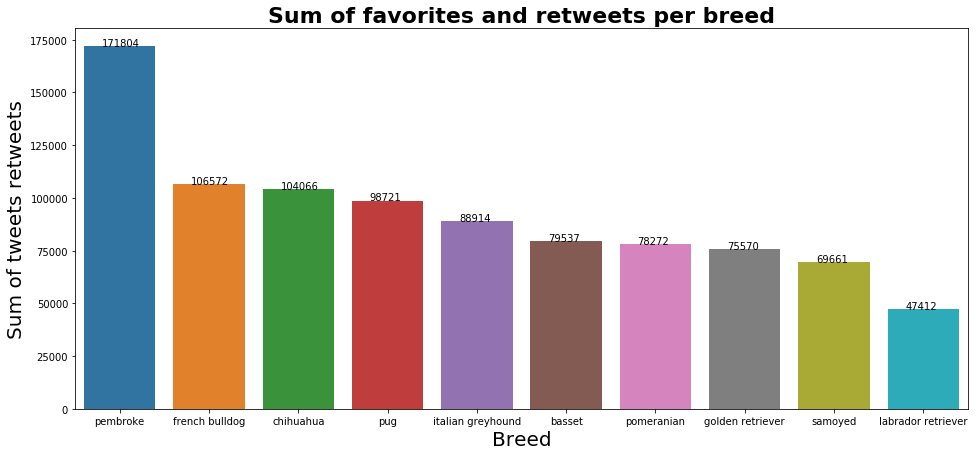

In [87]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = 'breed', y = 'sum', data = breed_group_df.sort_values('sum', ascending=False).iloc[:10])

ax.set_xlabel('Breed', fontsize = 20.0)
ax.set_ylabel('Sum of tweets retweets', fontsize = 20.0)
ax.set_title("Sum of favorites and retweets per breed", fontweight='bold', fontsize = 22.0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+9))

**2. What is the frequency of tweets being done by the users?**

In [88]:
merged_df_clean['day_of_week'] = merged_df_clean["timestamp"].apply(lambda x: x.dayofweek)

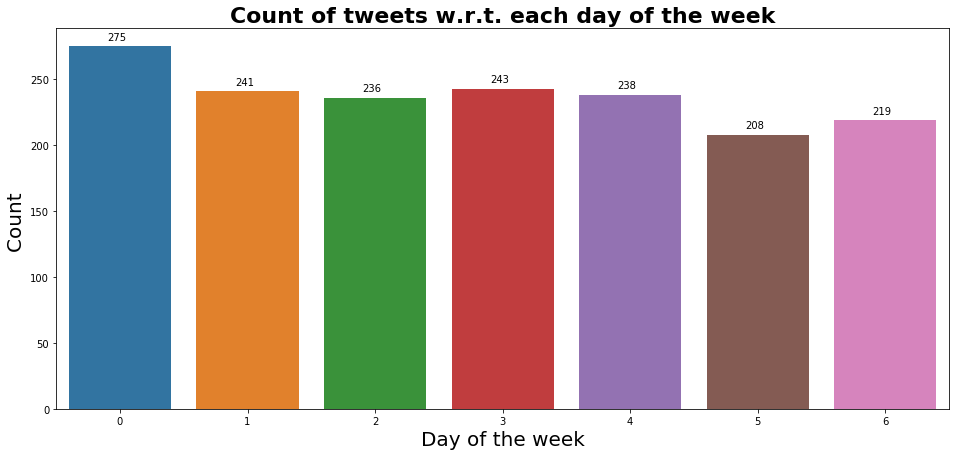

In [89]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.countplot(x = 'day_of_week', data = merged_df_clean)
ax.set_title('Count of tweets w.r.t. each day of the week', fontweight='bold', fontsize = 22.0)

ax.set_xlabel('Day of the week', fontsize = 20.0)
ax.set_ylabel('Count ', fontsize = 20.0)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

We can see that most of these tweets the maximum tweets published are on Monday, while the weekends the tweet frequency reduces.

In [90]:
#get the month out of the timestamp
merged_df_clean['month'] = merged_df_clean['timestamp'].apply(lambda x: x.month)

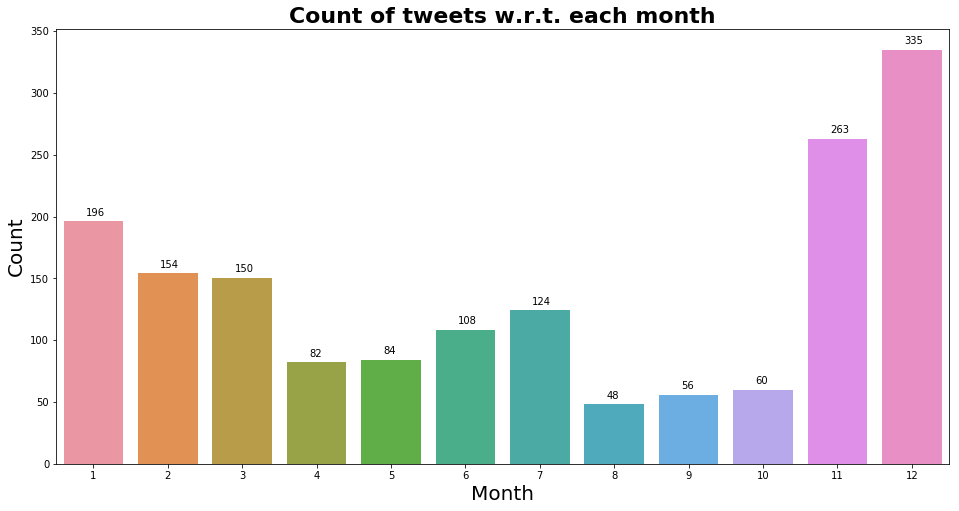

In [91]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'month', data = merged_df_clean)
ax.set_title('Count of tweets w.r.t. each month', fontweight='bold', fontsize = 22.0)
ax.set_xlabel('Month', fontsize = 20.0)
ax.set_ylabel('Count', fontsize = 20.0)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

For the frequency of tweets per month, we see that it is the maximum in the month of December while the minimum in the month of August

**3. What is the most predicted dog breed according to each of the algorithms?**

Text(0,0.5,'Count %')

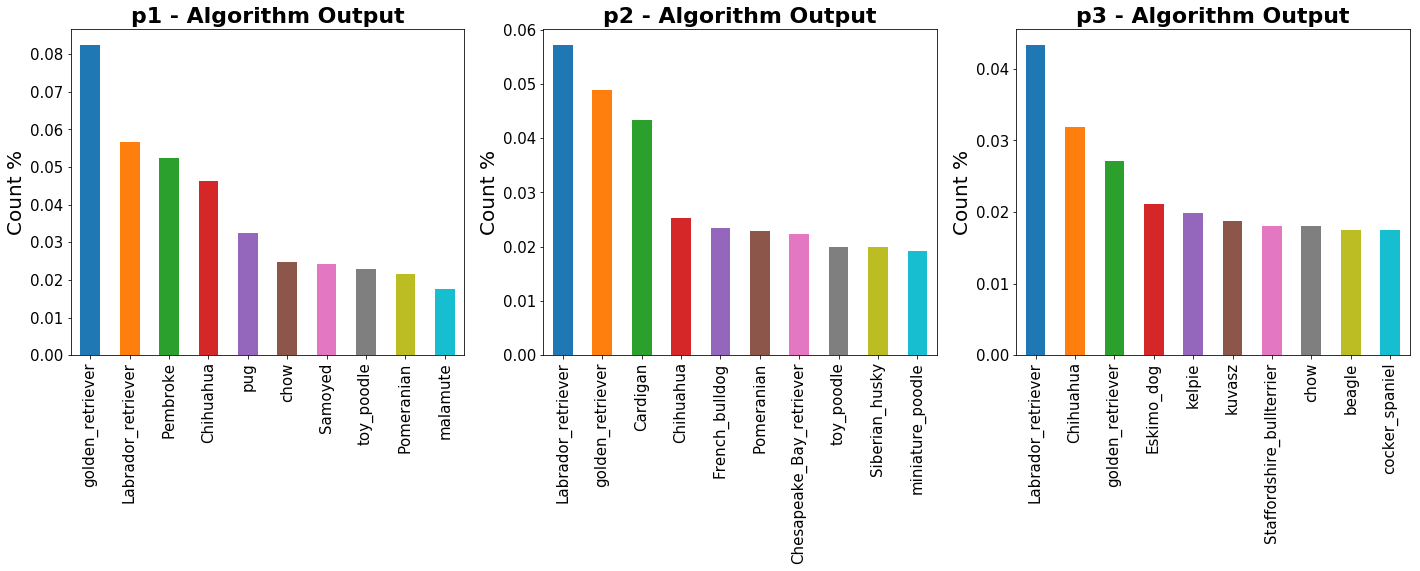

In [92]:
plt.figure(1)

plt.subplot(131)
merged_df_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - Algorithm Output', fontweight='bold', fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
merged_df_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 - Algorithm Output', fontweight='bold', fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
merged_df_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight='bold', fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

Mostly the algorithm predicted the dog to be either Golden Retriever, Labrador Retriever or Chihuahua

<a id='#conclusion'></a>
## Summary and Conclusions

In this project we went through a whole data wrangling process. The gathering included the programmatical, manual download as also the gathering via an API. Also the cleaning part covered a lot of techniques like regular expressions or the overall handling of dataframes. 

In the analysis we took a look at following questions: 

**Questions:**

<b>1. </b>Based on the predicted, most likely dog breed: Which breed gets retweeted and favorited the most overall?
- Labrador Retriever was the most liked and most tweeted breed among all.

<b>2. </b>What is the frequency of tweets being done by the users?
- We found, that the most tweets are done on Monday in a weekly based analysis, while in December the most tweets are done.

<b>3. </b>What is the most predicted dog breed according to each of the algorithms?
- Mostly the algorithm predicted the dog to be either Golden Retriever, Labrador Retriever or Chihuahua